In [3]:
# Loading the config file:
import os
files = os.listdir('./templates/ycbv_desc/models_xyz/')
print(files)

['norm_factor.json', 'obj_000016.ply', 'obj_000002.ply', 'obj_000003.ply', 'obj_000017.ply', 'obj_000001.ply', 'obj_000015.ply', 'obj_000014.ply', 'obj_000004.ply', 'obj_000010.ply', 'obj_000011.ply', 'obj_000005.ply', 'obj_000013.ply', 'obj_000007.ply', 'obj_000006.ply', 'obj_000012.ply', 'obj_000008.ply', 'obj_000020.ply', 'obj_000021.ply', 'obj_000009.ply', 'obj_000019.ply', 'obj_000018.ply', 'models_factor.json']


In [2]:
from zs6d import ZS6D
import os
import json




with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'],model_type='dino_vits8', stride=4,subset_templates=8, max_crop_size=80)

/run/media/kilian/Extern_SSD/Robot_Vision/ZS6D/zs6d-sd-dino/sd-dino/third_party/ODISE/odise/model_zoo/configs/Panoptic/odise_label_coco_50e.py
test
No module 'xformers'. Proceeding without it.
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


AssertionError: stride (4, 4) should divide patch_size 14

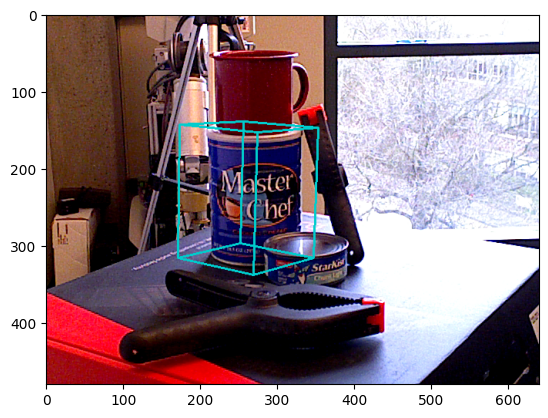

Pose estimation time: 12.74455189704895
R_est: [[ 0.59956706 -0.799728    0.03089454]
 [-0.11085916 -0.12121917 -0.98641581]
 [ 0.79260935  0.58799749 -0.1613362 ]]
t_est: [-40.86866755  -7.38762117 865.95630873]


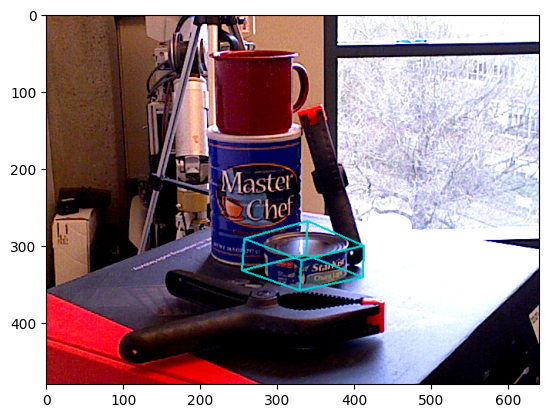

Pose estimation time: 11.790925025939941
R_est: [[-0.68145753 -0.73029615 -0.0477824 ]
 [-0.30608716  0.22509529  0.9250096 ]
 [-0.66477536  0.64498034 -0.37692716]]
t_est: [ -16.38980067  -58.31326817 -828.78800993]


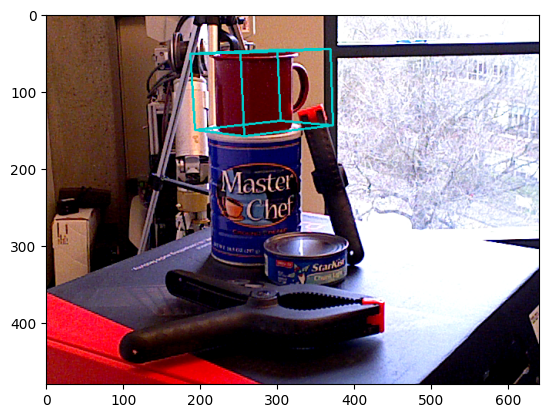

Pose estimation time: 10.711334943771362
R_est: [[ 0.78629924 -0.61681891 -0.03560828]
 [-0.146399   -0.13001281 -0.98064469]
 [ 0.60025065  0.77629318 -0.19253064]]
t_est: [ -26.6953914  -118.16486408  882.31034457]


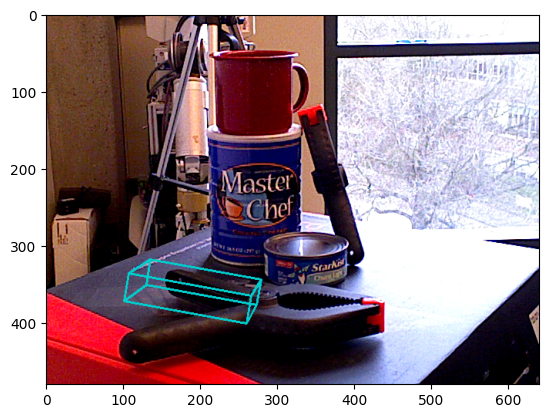

Pose estimation time: 11.729333639144897
R_est: [[-0.08139107 -0.98304547 -0.16430796]
 [ 0.0875852  -0.17127166  0.98132301]
 [-0.99282643  0.06547998  0.10004022]]
t_est: [  131.1687806   -129.00627614 -1180.43361544]


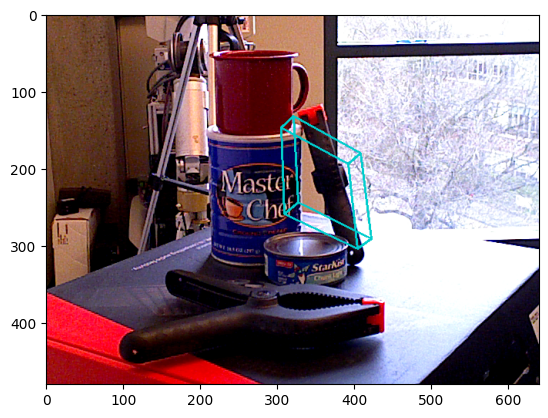

Pose estimation time: 9.941670894622803
R_est: [[ 0.03133011  0.790443    0.61173383]
 [ 0.75057723  0.3855592  -0.53663574]
 [-0.66003958  0.47596634 -0.58120891]]
t_est: [  68.79157198  -33.00404921 1484.21997031]


In [3]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    # own test
    img_path = os.path.join('test/', '000001.png')
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


